In [1]:
# note this is all in MNI152 Lin6 Asym (NOT c). Whole-ass headache making sure those correspond (MNI template, fmri data, and segmentation)

import nibabel as nib
import hcp_utils as hcp
import numpy as np
# specify the path to the NIfTI file
nifti_path = '/Users/panlab/sub-MDMA001_ses-00_task-emotion_acq-mb_dir-pe0_run-0_space-MNI152NLin6Asym_res-2_desc-denoised_bold.nii.gz'
# load the NIfTI file
nifti_image = nib.load(nifti_path)
nifti_data=nifti_image.get_fdata()
# get the header from the NIfTI image
nifti_header = nifti_image.header

# retrieve the resolution
resolution = nifti_header.get_zooms()

# retrieve segmentation
segmentation_path='/Users/panlab/Downloads/Tian_Subcortex_S3_3T.nii'
segmentation_image = nib.load(segmentation_path)
segmentation_data = segmentation_image.get_fdata()


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
import matplotlib.pyplot as plt
#nifti_data.shape
segmentation_data.shape

(91, 109, 91)

In [3]:
# Define the bounding box coordinates
y_start, y_end = 43, 64
x_start, x_end = 33, 57
z_start, z_end = 34, 46

# Extract the spatial subset
subset = nifti_data[x_start:x_end, y_start:y_end, z_start:z_end,:]

# and plot slices on MNI to clarify exactly what space is being inquiried
mni_path = '/Users/panlab/Downloads/MNI152_T1_2mm_Brain.nii.gz'
# Load the NIfTI file
mni_image = nib.load(mni_path)
mni_data=mni_image.get_fdata()

# Extract the spatial subset
mnisubset = mni_data[x_start:x_end, y_start:y_end, z_start:z_end]
# Get the header from the NIfTI image
nifti_header = mni_image.header

# compare segmentation header and mni header
print(nifti_header)
nifti_header = segmentation_image.header
print(nifti_header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8339.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0. 90.]
sr

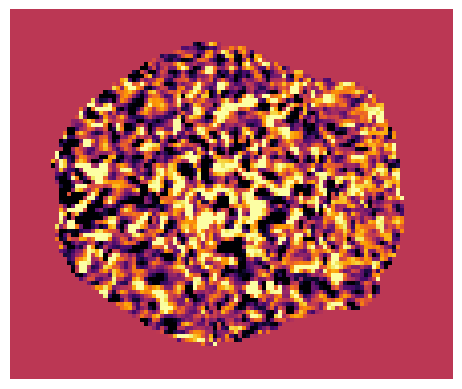

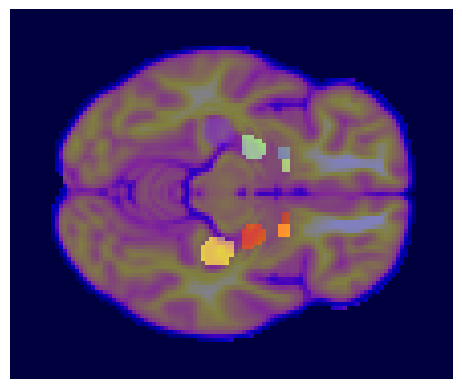

(91, 109, 91)

In [4]:
# Plot the central slice along the z-axis (assuming it's the axial plane)
z_slice = 30
plt.imshow(nifti_data[:, :, z_slice,0], cmap='inferno',vmin=-10, vmax=10)
plt.axis('off')
plt.show()

plt.imshow(mni_data[:, :, z_slice], cmap='gnuplot2',vmin=0,vmax=8000)
plt.axis('off')
plt.imshow(segmentation_data[:, :, z_slice], cmap='jet', alpha=0.5)
plt.show()

segmentation_data.shape

In [5]:
# get corresponding segmentation subset
segmentation_subset = segmentation_data[x_start:x_end, y_start:y_end, z_start:z_end]

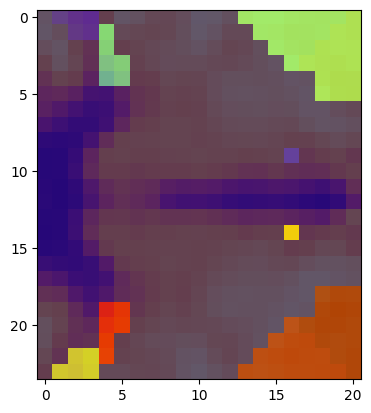

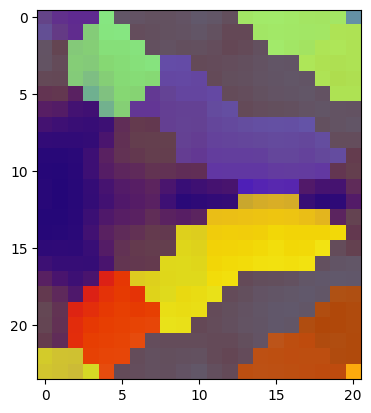

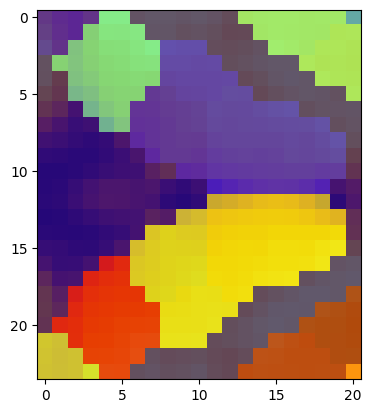

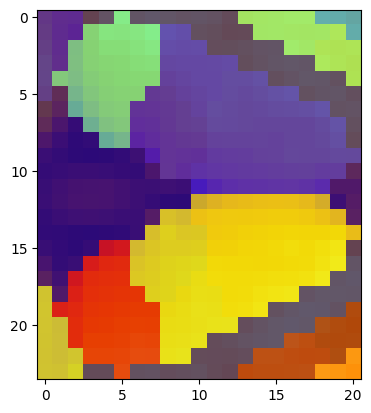

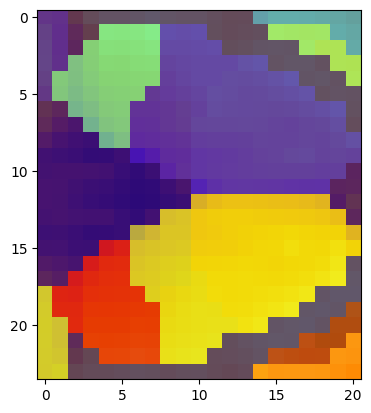

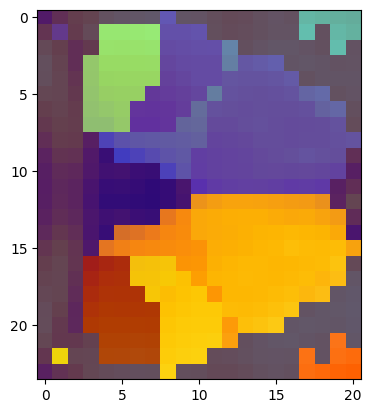

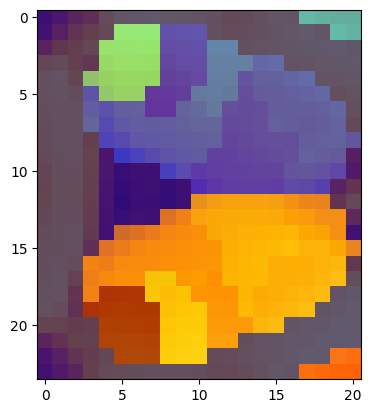

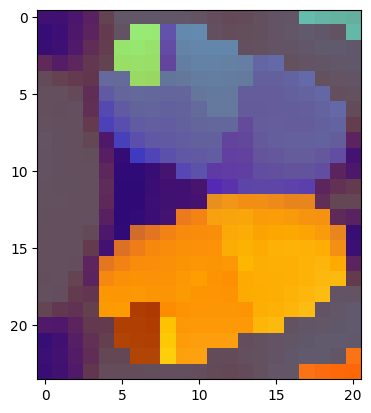

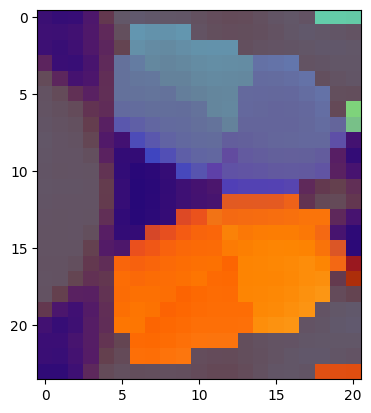

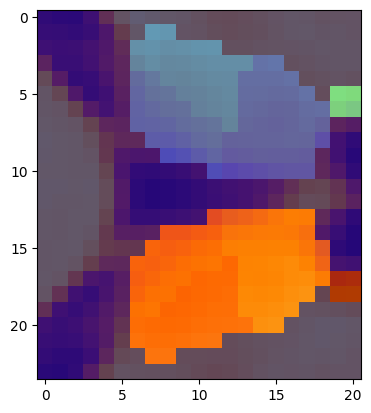

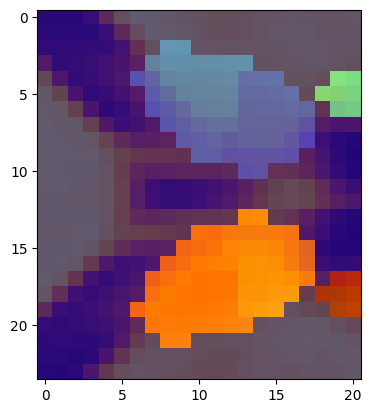

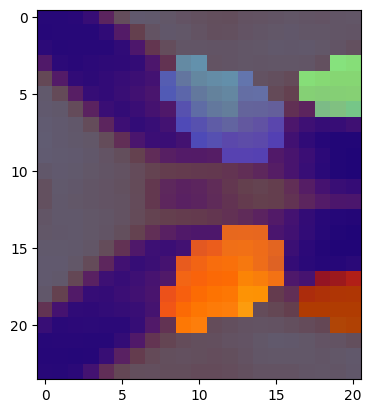

In [6]:
num_slices = z_end - z_start

#for i, z_slice in enumerate(range(z_start, z_end)):
#    plt.imshow(mnisubset[:, :, i], cmap='gray',vmin=0, vmax=8000)
#    plt.show()
 
# same spatial dimensions for one functional image
#for i, z_slice in enumerate(range(z_start, z_end)):
#    plt.imshow(subset[:, :, i,0], cmap='inferno',vmin=-50, vmax=50)
#    plt.show()
    
# one slice over time
#for i, z_slice in enumerate(range(z_start, z_end)):
#    plt.imshow(subset[:, :, 5,i], cmap='gnuplot2',vmin=-30, vmax=30)
#    plt.show() 
    
for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(mnisubset[:, :, i], cmap='inferno', vmin=0, vmax=8000)
    plt.imshow(segmentation_subset[:, :, i], cmap='jet', alpha=0.6)
    plt.show()


In [20]:
subset.shape
# now that the box is bounded, try fitting a few optical flow methods in first three frames

(16, 14, 8)

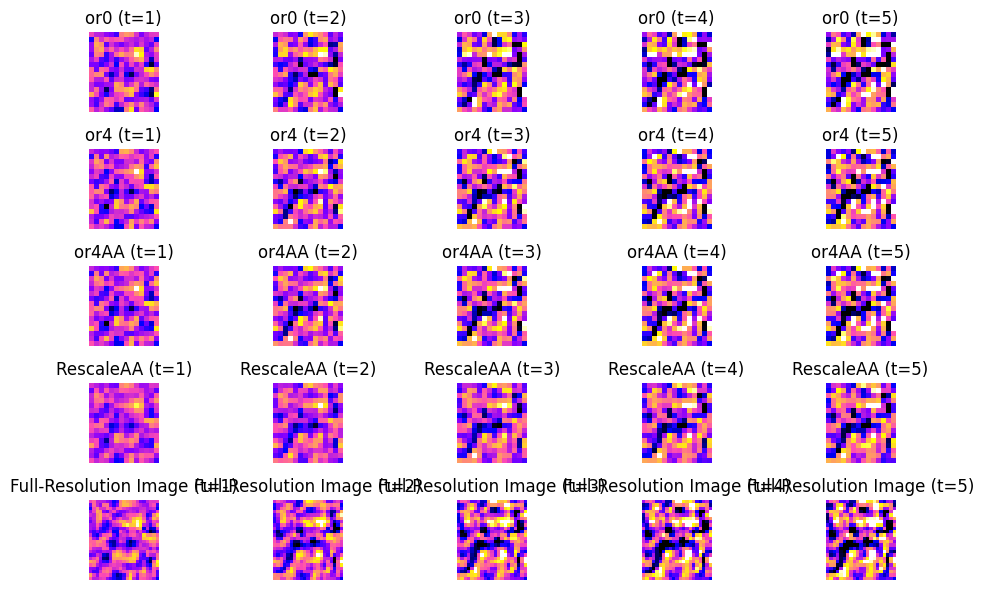

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.transform as skTrans

# Load the original 3D image
original_image = subset

# Define the desired downsampled shape (2/3rds resolution except temporal dimension)
downsampled_shape = (16, 14, 8, subset.shape[3])

# Downsample the original image using resize from skimage.transform
result1 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result1[:, :, :, i] = skTrans.resize(original_image[:, :, :, i], (16, 14, 8), order=0, preserve_range=True)

# Downsample the original image using resize from skimage.transform: try different parameters
result2 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result2[:, :, :, i] = skTrans.resize(original_image[:, :, :, i], (16, 14, 8), order=4, preserve_range=True)

# Downsample the original image using resize from skimage.transform: try different parameters
result3 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result3[:, :, :, i] = skTrans.resize(original_image[:, :, :, i], (16, 14, 8), order=4, preserve_range=True, anti_aliasing=True)

# Downsample the original image using rescale from skimage.transform: try different parameters
result4 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result4[:, :, :, i] = skTrans.rescale(original_image[:, :, :, i], (2/3), preserve_range=True, anti_aliasing=True)

#downsample segmention to try that out
resultSeg=np.zeros(downsampled_shape)
resultSeg=skTrans.resize(segmentation_subset[:,:,:],output_shape=(16,14,8),order=0, preserve_range=True, anti_aliasing=False)

# Define the z-slice index to visualize
z_slice_full_res = 9
z_slice_downsampled = int(z_slice_full_res / (subset.shape[2] / downsampled_shape[2]))

# Define the figure size and subplot arrangement
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))

# Plot the downsampled and full-resolution images
for i in range(5):
    # Plot the downsampled image
    col_idx = i
    axes[0, col_idx].imshow(result1[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[0, col_idx].set_title("or0 (t={})".format(i+1))
    axes[0, col_idx].axis('off')

    # param 2
    axes[1, col_idx].imshow(result2[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[1, col_idx].set_title("or4 (t={})".format(i+1))
    axes[1, col_idx].axis('off')

    # param 3
    axes[2, col_idx].imshow(result3[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[2, col_idx].set_title("or4AA (t={})".format(i+1))
    axes[2, col_idx].axis('off')

    # param 4
    axes[3, col_idx].imshow(result4[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[3, col_idx].set_title("RescaleAA (t={})".format(i+1))
    axes[3, col_idx].axis('off')

    # Plot the full-resolution image
    axes[4, col_idx].imshow(subset[:, :, z_slice_full_res, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[4, col_idx].set_title("Full-Resolution Image (t={})".format(i+1))
    axes[4, col_idx].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [56]:
resultSeg.shape

# add path to imes4d
import sys
sys.path.append('/Users/panlab/Downloads/imes4d/')

In [13]:
import sys
sys.path.append('/Users/panlab/Downloads/imes4d/imes4d')
from PyrLK3D import PyrLK3D
from imes4d.utils import Timer, ransac, blend_volumes, create_dummy_data
from mpl_toolkits.mplot3d import Axes3D
# create image 1 and 2 from bounded box of fmri series image 1 and 2
image1=result4[:,:,:,0].astype(np.float32)
image2=result4[:,:,:,1].astype(np.float32)
image3=result4[:,:,:,2].astype(np.float32)
# Create the array listing every point
indices = np.mgrid[0:16, 0:13, 0:7]
points = np.transpose(indices.reshape(3, -1))
# Access the values at each point in the subset
prev_pts=points

In [14]:
prev_pts.shape

(1456, 3)

In [15]:
# create the optical flow object
lk = PyrLK3D(image1, image2, prev_pts, win_size=(5, 5, 5), levels=3, eps=1e-3, max_iterations=200)

In [16]:
# calculate optical flow, pyramidal lukas-kanade (https://github.com/mlaves/imes4d/blob/master/imes4d/PyrLK3D.py)
with Timer('pyr_lk'):
        flow, err, it = lk.calc_flow()

[pyr_lk]
Elapsed: 413.07637000083923 s


In [17]:
# find best 25 % matches
mean_err = np.mean(np.sort(err)[:int(len(err) / 4)])
best_flow = np.array([i for i, e in zip(flow, err) if e < mean_err])
best_prev = np.array([i for i, e in zip(prev_pts, err) if e < mean_err])

In [18]:
prev_pts.shape

(1456, 3)

In [151]:
# add another round of optical flow to see what next timepoint looks like
lk2 = PyrLK3D(image2, image3, prev_pts, win_size=(5, 5, 5), levels=3, eps=1e-3, max_iterations=200)
# calculate optical flow, pyramidal lukas-kanade (https://github.com/mlaves/imes4d/blob/master/imes4d/PyrLK3D.py)
with Timer('pyr_lk'):
        flow2, err, it = lk2.calc_flow()
        
# find best 25 % matches
mean_err = np.mean(np.sort(err)[:int(len(err) / 4)])
best_flow = np.array([i for i, e in zip(flow, err) if e < mean_err])
best_prev = np.array([i for i, e in zip(prev_pts, err) if e < mean_err])

[pyr_lk]
Elapsed: 344.5105412006378 s


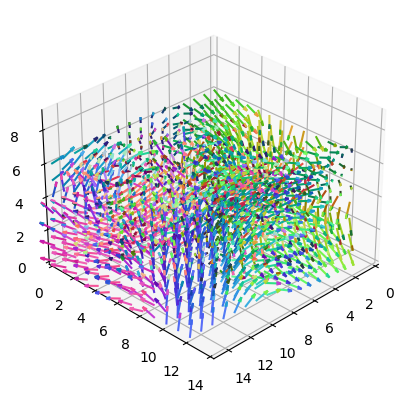

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and 3D axes
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow, axis=1)

# Normalize the flow vectors
normalized_flow = flow / magnitudes[:, np.newaxis]

# Convert orientations to RGB colors
colors = np.zeros((len(magnitudes), 3))
colors[:, 0] = normalized_flow[:, 0]   # Red component (x-axis)
colors[:, 1] = normalized_flow[:, 1]   # Green component (y-axis)
colors[:, 2] = normalized_flow[:, 2]   # Blue component (z-axis)

# Normalize the colors to the range of 0-1
colors = (colors - colors.min()) / (colors.max() - colors.min())

# Plot the vectors with colored orientations
ax3.quiver(prev_pts[:, 0], prev_pts[:, 1], prev_pts[:, 2],
           flow[:, 0], flow[:, 1], flow[:, 2], normalize=True, color=colors)

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 15])
ax3.set_ylim([0, 14])
ax3.set_zlim([0, 9])
ax3.view_init(elev=30, azim=45)

# Save the figure
plt.savefig('vectors_ds.pdf', dpi=1500, bbox_inches='tight')

# Show the figure
plt.show()



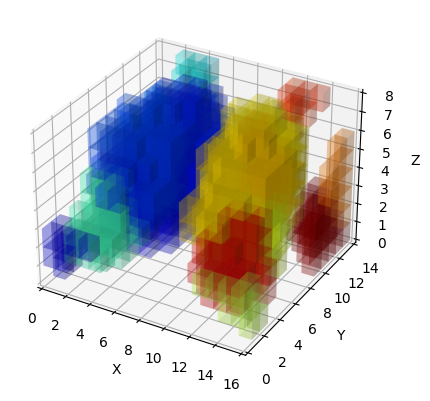

In [69]:
from matplotlib import colors
# Get the shape of the segmentation
x_dim, y_dim, z_dim = resultSeg.shape

# Create a new figure and 3D axes
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
#ax3d.view_init(elev=90, azim=0)

# Define the colormap and normalize the values
cmap = plt.cm.jet
norm = colors.Normalize(vmin=resultSeg.min(), vmax=resultSeg.max())

# Iterate over each voxel
for x in range(x_dim):
    for y in range(y_dim):
        for z in range(z_dim):
            # Check if the voxel is non-zero (part of the segmentation)
            if resultSeg[x, y, z] != 0:
                # Calculate the coordinates of the voxel corners - # note [::-1] is for plotting
                x_coords = [x - 0.5, x - 0.5, x + 0.5, x + 0.5, x - 0.5, x - 0.5, x + 0.5, x + 0.5]
                y_coords = [y - 0.5, y + 0.5, y + 0.5, y - 0.5, y - 0.5, y + 0.5, y + 0.5, y - 0.5]
                z_coords = [z - 0.5, z - 0.5, z + 0.5, z + 0.5, z + 0.5, z + 0.5, z - 0.5, z - 0.5]

                # Get the value of the voxel
                value = resultSeg[x, y, z]

                # Normalize the value to the range [0, 1]
                normalized_value = norm(value)

                # Get the color corresponding to the normalized value
                color = cmap(normalized_value)

                # Plot the voxel as a semi-transparent block with the assigned color
                ax3d.bar3d(x, y, z, 1, 1, 1, alpha=0.2, color=color)

# Set the limits and labels of the plot
ax3d.set_xlim([0, x_dim])
ax3d.set_ylim([0, y_dim])
ax3d.set_zlim([0, z_dim])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

# Show the figure
plt.show()



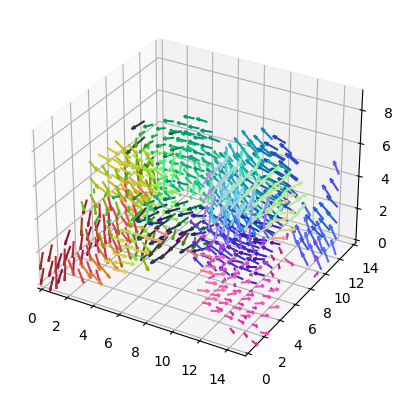

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and 3D axes
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow, axis=1)

# Normalize the flow vectors
normalized_flow = flow / magnitudes[:, np.newaxis]

# Convert orientations to RGB colors
colors = np.zeros((len(magnitudes), 3))
colors[:, 0] = normalized_flow[:, 0]   # Red component (x-axis)
colors[:, 1] = normalized_flow[:, 1]   # Green component (y-axis)
colors[:, 2] = normalized_flow[:, 2]   # Blue component (z-axis)

# Normalize the colors to the range of 0-1
colors = (colors - colors.min()) / (colors.max() - colors.min())

# Iterate over each vector and check if corresponding resultSeg value is non-zero
for i in range(len(prev_pts)):
    if resultSeg[int(prev_pts[i, 0]), int(prev_pts[i, 1]), int(prev_pts[i, 2])] != 0:
        # Plot the vectors with colored orientations for non-zero resultSeg values
        ax3.quiver(prev_pts[i, 0], prev_pts[i, 1], prev_pts[i, 2],
                   flow[i, 0], flow[i, 1], flow[i, 2], normalize=True, color=colors[i])

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 15])
ax3.set_ylim([0, 14])
ax3.set_zlim([0, 9])

# Save the figure
plt.savefig('vectors_ds.pdf', dpi=1500, bbox_inches='tight')

# Show the figure
plt.show()


In [58]:
resultSeg.shape

(16, 14, 8, 187)

In [ ]:
#### SECOND VECTOR FIELD
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow2, axis=1)

# Normalize the flow vectors
normalized_flow = flow2 / magnitudes[:, np.newaxis]

# Convert orientations to RGB colors
colors = np.zeros((len(magnitudes), 3))
colors[:, 0] = normalized_flow[:, 0]   # Red component (x-axis)
colors[:, 1] = normalized_flow[:, 1]   # Green component (y-axis)
colors[:, 2] = normalized_flow[:, 2]   # Blue component (z-axis)

# Normalize the colors to the range of 0-1
colors = (colors - colors.min()) / (colors.max() - colors.min())

# Plot the vectors with colored orientations
ax3.quiver(prev_pts[:, 0], prev_pts[:, 1], prev_pts[:, 2],
           flow2[:, 0], flow2[:, 1], flow2[:, 2], normalize=True, color=colors)

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 14])
ax3.set_ylim([0, 13])
ax3.set_zlim([0, 8])
ax3.view_init(elev=30, azim=45)

# Save the figure
plt.savefig('vectors_ds_2.pdf', dpi=1500, bbox_inches='tight')

# Show the figure
plt.show()


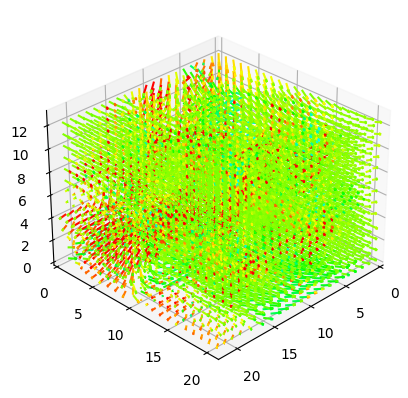

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and 3D axes
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow, axis=1)

# Normalize the flow vectors
normalized_flow = flow / magnitudes[:, np.newaxis]

# Compute the orientations of the vectors
orientations = np.arctan2(normalized_flow[:, 1], normalized_flow[:, 0])

# Color the vectors based on their orientations
colors = orientations / (2 * np.pi)

# Plot the vectors with colored orientations
ax3.quiver(prev_pts[:, 0], prev_pts[:, 1], prev_pts[:, 2],
           flow[:, 0], flow[:, 1], flow[:, 2], normalize=True, color=plt.cm.hsv(colors))

# Set the colorbar to show the orientation values
#cbar = plt.colorbar(orientation='horizontal')
#cbar.set_label('Orientation')

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 22])
ax3.set_ylim([0, 21])
ax3.set_zlim([0, 13])
ax3.view_init(elev=30, azim=45)

# Save the figure
plt.savefig('vectors.pdf', dpi=800, bbox_inches='tight')

# Show the figure
plt.show()
